In [32]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from google.colab import files

# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [33]:
# uploaded = files.upload()

# Data Pre-processing
Abbiamo pre-processato i dati andando ad eliminare i primi 2 secondi di dati in quanto abbiamo ritenuto non fossero direttamente collegati all'attivitá di estrazione o riposizionamento del telefono dalla tasca. 
Abbiamo inoltre sostituito la label con un formato numerico, piú adatto alla rete neurale rispetto alla stringa, formato piú human-readable.

In [34]:
accelerometer = pd.read_csv("SensorData_Acc_0.csv")
gyroscope = pd.read_csv("SensorData_Gyr_0.csv")
rotation = pd.read_csv("SensorData_Rot_0.csv")
gravity = pd.read_csv("SensorData_Grav_0.csv")
linearAcceleration = pd.read_csv("SensorData_LinAcc_0.csv")

del accelerometer["Unnamed: 5"]
del gyroscope["Unnamed: 5"]
del rotation["Unnamed: 4"]
del gravity["Unnamed: 5"]
del linearAcceleration["Unnamed: 5"]

accelerometer.columns = ["acceleration-x", "acceleration-y", "acceleration-z", "timestamp", "label"]
accelerometer.index = accelerometer["timestamp"]

gyroscope.columns = ["gyroscope-x", "gyroscope-y", "gyroscope-z", "timestamp", "label"]
gyroscope.index = gyroscope["timestamp"]

gravity.columns = ["gravity-x", "gravity-y", "gravity-z", "timestamp", "label"]
gravity.index = gravity["timestamp"]

#rotation.columns = ["rotation-x", "rotation-y", "rotation-z", "timestamp", "label"]
#rotation.index = rotation["timestamp"]

linearAcceleration.columns = ["linearAcceleration-x", "linearAcceleration-y", "linearAcceleration-z", "timestamp", "label"]
linearAcceleration.index = linearAcceleration["timestamp"]

del accelerometer["timestamp"]
del gyroscope["timestamp"]
del gyroscope["label"]
del gravity["timestamp"]
del gravity["label"]
del linearAcceleration["timestamp"]
del linearAcceleration["label"]
#del rotation["timestamp"]
#del rotation["label"]

merged = pd.merge(accelerometer, gyroscope, left_index=True, right_index=True)
merged = pd.merge(merged, gravity, left_index=True, right_index=True)
merged = pd.merge(merged, linearAcceleration, left_index=True, right_index=True)
#merged = pd.merge(merged, rotation, left_index=True, right_index=True)

merged.to_csv("merged.csv")

# 50 hz sampling rate, 600 sample/seconds, discard first two seconds of data
N = 1000 
merged = merged.iloc[N: , :]
 
# Removing last n rows
merged = merged.iloc[:-N]

print(f"OTHER values {len(merged[(merged['label']=='OTHER')])}\n")
print(f"PICKUP values {len(merged[(merged['label']=='PICKUP')])}\n")
print(f"PUTDOWN values {len(merged[(merged['label']=='PUTDOWN')])}\n")

print(f"OTHER values are { (len(merged[(merged['label']=='OTHER')]) / len(merged)) * 100}% of the data\n")
print(f"PICKUP values are { (len(merged[(merged['label']=='PICKUP')]) / len(merged)) * 100}% of the data\n")
print(f"PUTDOWN values are { (len(merged[(merged['label']=='PUTDOWN')]) / len(merged)) * 100}% of the data\n")


print(merged.shape)

"""

plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-z"])

plt.show()

plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-z"])

plt.show()
"""

mapping = {'PICKUP': 0, 'OTHER': 1}
merged.replace({'label': mapping})

merged.label = [mapping[item] for item in merged.label]

print(merged)

training_data, testing_data = train_test_split(merged, test_size=0.25, random_state=25)

training_labels = training_data["label"]
del training_data["label"]

testing_labels = testing_data["label"]
del testing_data["label"]

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

training_data = np.asarray(training_data).astype('float32')
training_labels = np.asarray(training_labels).astype('float32')
testing_data = np.asarray(testing_data).astype('float32')
testing_labels = np.asarray(testing_labels).astype('float32')

OTHER values 13438

PICKUP values 15364

PUTDOWN values 0

OTHER values are 46.656482188736895% of the data

PICKUP values are 53.343517811263105% of the data

PUTDOWN values are 0.0% of the data

(28802, 13)
                  acceleration-x  acceleration-y  acceleration-z  label  \
timestamp                                                                 
4833537167677.000       9.545682          -7.217           3.762      1   
4833557167677.000       9.190144          -5.765           4.323      1   
4833564301927.000       9.190144          -5.765           4.323      1   
4833578672218.000      8.8645315          -5.672           3.907      1   
4833598794677.000       7.902063          -6.578           3.072      1   
...                          ...             ...             ...    ...   
8391794991290.000      1.8590976          12.373           0.375      0   
8391816504540.000      2.3834279          12.750           2.707      0   
8391837102623.000      1.5155296         

# Costruzione modello
Abbiamo quindi costruito un CNN utilizzando il modulo Tensorflow con diversi livelli.


In [35]:
model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(1000, activation="sigmoid"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(500, activation="sigmoid"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation="softmax"))

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=200, validation_data=(testing_data, testing_labels))
model.save(".")

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


676/676 [==============================] - 12s 16ms/step - loss: 0.7421 - accuracy: 0.7332 - val_loss: 0.4548 - val_accuracy: 0.7803
Epoch 2/200
676/676 [==============================] - 11s 16ms/step - loss: 0.4412 - accuracy: 0.7907 - val_loss: 0.3806 - val_accuracy: 0.8306
Epoch 3/200
676/676 [==============================] - 10s 15ms/step - loss: 0.3713 - accuracy: 0.8273 - val_loss: 0.3309 - val_accuracy: 0.8542
Epoch 4/200
676/676 [==============================] - 10s 15ms/step - loss: 0.3370 - accuracy: 0.8479 - val_loss: 0.3186 - val_accuracy: 0.8609
Epoch 5/200
676/676 [==============================] - 10s 14ms/step - loss: 0.3121 - accuracy: 0.8602 - val_loss: 0.3031 - val_accuracy: 0.8611
Epoch 6/200
676/676 [==============================] - 9s 13ms/step - loss: 0.2987 - accuracy: 0.8652 - val_loss: 0.2555 - val_accuracy: 0.8915
Epoch 7/200
676/676 [==============================] - 9s 14ms/step - loss: 0.2805 - accuracy: 0.8745 - val_loss: 0.2720 - val_accuracy: 0.8778

# Model evaluation
Metriche per la valutazione del modello e della capacità predittiva

226/226 - 1s - loss: 0.0749 - accuracy: 0.9828 - 837ms/epoch - 4ms/step


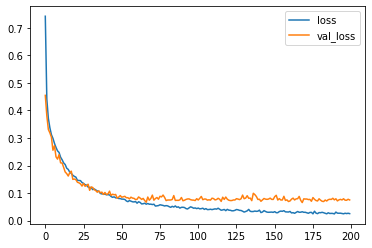

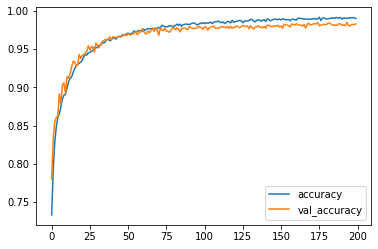

In [37]:
test_loss, test_acc = model.evaluate(testing_data,  testing_labels, verbose=2)

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();

In [38]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(".") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('pickupClassifier.tflite', 'wb') as f:
  f.write(tflite_model)